In [1]:
#Objective:
# val acc ~72% normally on a small dataset
#To counter over-fitting, use dropout (?), weight decay (L2 regularization) and data augmentation
# val acc due to drop out and augmentation increased to ~82
# next to further improve: use a pre-trained convnet model!
# A pre-trained model, trained on a larger set. A generic model develops features that can
#be used even on a small data problem
#2 ways to use it: 1) feature extraction 2 options 2) fine-tuning
#we are using VGG16 pre-trained model architechture (ResNet, Inception, Xception etc are others)

In [ ]:
#THIS IS SMALL CONVNET EXAMPLE

In [1]:
#System Check
import sys;print('python version:',sys.version) 
import tensorflow as tf;print('tf_version:',tf.__version__) #tf: 2.1 
from tensorflow import keras; print('keras version:',keras.__version__) 
import keras 
print("keras version on its own:",keras.__version__) #tf keras and keras library can have different versions
from tensorflow.python.platform import build_info as tf_build_info 
#print('CUDA Version:',tf_build_info.cuda_version_number) 
#print('CUDNN Version:',tf_build_info.cudnn_version_number)

import tensorflow as tf
tf.test.is_gpu_available() # True/False
print("GPU Status:",tf.test.is_gpu_available())

#Releases the python gpu memory
from numba import cuda
cuda.select_device(0)
cuda.close()

"""
# Or only check for gpu's with cuda support
tf.test.is_gpu_available(cuda_only=True) 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
"""

python version: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
tf_version: 1.14.0
keras version: 2.2.4-tf
keras version on its own: 2.2.4
GPU Status: False


Using TensorFlow backend.


"\n# Or only check for gpu's with cuda support\ntf.test.is_gpu_available(cuda_only=True) \nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())\n"

In [5]:
import os, shutil

#img_folder
original_dataset_dir='/home/oj/Downloads/4types_images/all'



####Create train, validation and test folders and sub-folders. Keras needs sub-folders:https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Create a Test Dir##### #create a folder "train": os.path.join gets path and the name of the new directory#os.mkdir(directory_name_path) makes it#You have to error check whether the folder already exist

############Create High level train, val and test folders and sub-folders####
train_dir = os.path.join(original_dataset_dir, 'train') 
if os.path.exists(train_dir):
    pass #does nothing
else :
    os.mkdir(train_dir)

train_sub_dir = os.path.join(train_dir, 'train_sub') 
if os.path.exists(train_sub_dir):
    pass #does nothing
else :
    os.mkdir(train_sub_dir)
    
# #####Create a Validation Dir#####
validation_dir = os.path.join(original_dataset_dir, 'validation') 
if os.path.exists(validation_dir):
    pass #does nothing
else :
    os.mkdir(validation_dir)

validation_sub_dir = os.path.join(validation_dir, 'validation_sub') 
if os.path.exists(validation_sub_dir):
    pass #does nothing
else :
    os.mkdir(validation_sub_dir)

####Create a Test Dir#####
test_dir = os.path.join(original_dataset_dir, 'test') 
if os.path.exists(test_dir):
    pass #does nothing
else :
    os.mkdir(test_dir)

test_sub_dir = os.path.join(test_dir, 'test_sub') 
if os.path.exists(test_sub_dir):
    pass #does nothing
else :
    os.mkdir(test_sub_dir)
    
#####################################sub-directories of each type######

############################## 4 training folders ###################   
# Directory with our training incertum pictures
train_incertum_dir = os.path.join(train_sub_dir, 'incertum')
#os.mkdir(train_incertum_dir)

# Directory with our training latericium pictures
train_latericium_dir = os.path.join(train_sub_dir, 'latericium')
#os.mkdir(train_latericium_dir)
    
# Directory with our training vittatum pictures
train_vittatum_dir = os.path.join(train_sub_dir, 'vittatum')
#os.mkdir(train_vittatum_dir)
    
# Directory with our training vittatum_mixtumpictures
train_vittatum_mixtum_dir = os.path.join(train_sub_dir, 'vittatum_mixtum')
#os.mkdir(train_vittatum_mixtum_dir)


############################## 4 validation folders ###################   
# Directory with our training incertum pictures
validation_incertum_dir = os.path.join(validation_sub_dir, 'incertum')
#os.mkdir(validation_incertum_dir)

# Directory with our training latericium pictures
validation_latericium_dir = os.path.join(validation_sub_dir, 'latericium')
#os.mkdir(validation_latericium_dir)
    
# Directory with our training vittatum pictures
validation_vittatum_dir = os.path.join(validation_sub_dir, 'vittatum')
#os.mkdir(validation_vittatum_dir)
    
# Directory with our training vittatum_mixtump pictures
validation_vittatum_mixtum_dir = os.path.join(validation_sub_dir, 'vittatum_mixtum')
#os.mkdir(validation_vittatum_mixtum_dir)


############################## 4 test folders ###################      
# Directory with our training incertum pictures
test_incertum_dir = os.path.join(test_sub_dir, 'incertum')
#os.mkdir(test_incertum_dir)

# Directory with our training latericium pictures
test_latericium_dir = os.path.join(test_sub_dir, 'latericium')
#os.mkdir(test_latericium_dir)
    
# Directory with our training vittatum pictures
test_vittatum_dir = os.path.join(test_sub_dir, 'vittatum')
#os.mkdir(test_vittatum_dir)
    
# Directory with our training vittatum_mixtump pictures
test_vittatum_mixtum_dir = os.path.join(test_sub_dir, 'vittatum_mixtum')
#os.mkdir(test_vittatum_mixtum_dir)




In [31]:
####5.2.2 - Images are Not Randomly Saved. Copies images from main folder to respective train,val and test #####


#################incertum#########################3
#Train
fnames = ['incertum{}.jpg'.format(i) for i in range(1,161)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_incertum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['incertum{}.jpg'.format(i) for i in range(161,181)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_incertum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['incertum{}.jpg'.format(i) for i in range(181,201)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_incertum_dir, fname)
    shutil.copyfile(src, dst)

print('incertum train images: ',len(os.listdir(train_incertum_dir)))
print('incertum val images: ',len(os.listdir(validation_incertum_dir)))
print('incertum test images: ',len(os.listdir(test_incertum_dir)))

#################latericium#########################3
#Train
fnames = ['latericium{}.jpg'.format(i) for i in range(1,41)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_latericium_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['latericium{}.jpg'.format(i) for i in range(41,51)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_latericium_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['latericium{}.jpg'.format(i) for i in range(51,61)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_latericium_dir, fname)
    shutil.copyfile(src, dst)

print('latericium train images: ',len(os.listdir(train_latericium_dir)))
print('latericium val images: ',len(os.listdir(validation_latericium_dir)))
print('latericium test images: ',len(os.listdir(test_latericium_dir)))


#################vittatum#########################3
#Train
fnames = ['vittatum{}.jpg'.format(i) for i in range(1,18)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_vittatum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['vittatum{}.jpg'.format(i) for i in range(18,22)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_vittatum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['vittatum{}.jpg'.format(i) for i in range(22,26)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_vittatum_dir, fname)
    shutil.copyfile(src, dst)

print('vittatum train images: ',len(os.listdir(train_vittatum_dir)))
print('vittatum val images: ',len(os.listdir(validation_vittatum_dir)))
print('vittatum test images: ',len(os.listdir(test_vittatum_dir)))


#################vittatum_mixtum#########################3
#Train
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(1,32)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(32,36)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['vittatum_mixtum{}.jpg'.format(i) for i in range(36,40)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_vittatum_mixtum_dir, fname)
    shutil.copyfile(src, dst)

print('vittatum_mixtum train images: ',len(os.listdir(train_vittatum_mixtum_dir)))
print('vittatum_mixtum val images: ',len(os.listdir(validation_vittatum_mixtum_dir)))
print('vittatum_mixtum test images: ',len(os.listdir(test_vittatum_mixtum_dir)))


FileNotFoundError: [Errno 2] No such file or directory: '/home/oj/Downloads/4types_images/all/incertum1.jpg'

In [3]:
#Model
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

NameError: name 'Flatten' is not defined

In [59]:
#fitting the data (answers, input images) into the model/network is the same as training it
history = model.fit_generator( #model.fit - we name it history? interesting
      train_generator, #aboove train generator
      steps_per_epoch=5, #samples per epoch. total train_images/batch_size. Our case 2000/20=100; 2000 is cat+dog; takes these many gradien steps before going to the next epoch
      epochs=30,
      validation_data=validation_generator, #can be tuple or a data generator; but if latter then you should specify val_steps that tell the process how many batches to draw from the validation generator; otherwise, goes on forever
      validation_steps=5)

Epoch 1/30
5/5 [==============================] - 1s 199ms/step - loss: 0.3029 - acc: 0.6493 - val_loss: 6.3872 - val_acc: 0.5417
Epoch 2/30
5/5 [==============================] - 1s 179ms/step - loss: 0.2128 - acc: 0.7400 - val_loss: 6.8471 - val_acc: 0.5435
Epoch 3/30
5/5 [==============================] - 1s 188ms/step - loss: 0.2911 - acc: 0.5800 - val_loss: 6.7234 - val_acc: 0.5625
Epoch 4/30
5/5 [==============================] - 1s 183ms/step - loss: 0.2853 - acc: 0.6000 - val_loss: 6.9860 - val_acc: 0.5000
Epoch 5/30
5/5 [==============================] - 1s 186ms/step - loss: 1.2341 - acc: 0.6800 - val_loss: 5.0573 - val_acc: 0.5417
Epoch 6/30
5/5 [==============================] - 1s 172ms/step - loss: 1.3529 - acc: 0.6653 - val_loss: 4.7983 - val_acc: 0.5000
Epoch 7/30
5/5 [==============================] - 1s 182ms/step - loss: 1.2891 - acc: 0.5800 - val_loss: 6.5146 - val_acc: 0.4792
Epoch 8/30
5/5 [==============================] - 1s 183ms/step - loss: 1.2512 - acc: 0.60

In [60]:
#Save ya model - good practice
model.save('opus_4_classes_small_convnet.h5')
model.save_weights('opus_4_classes_small_convnet_weights.h5')

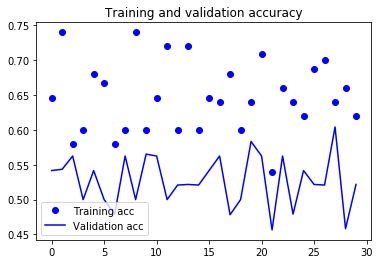

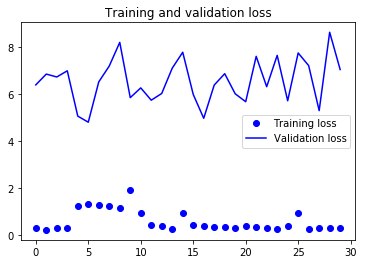

In [61]:
#plot the loss and accuracy of the model over the training and validation data during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#0.1 in y-axis is 10%; x-axis=epochs
#This plot is characteristic of over-fitting.
#Validation accuracy caps at 0.7 and loss increases over the epochs. 
#Why do we not see that with training? Is it because training images 2000 are double in number 1000?
#To couter over-fitting, use dropout, weight decay (L2 regularization) and data augmentation

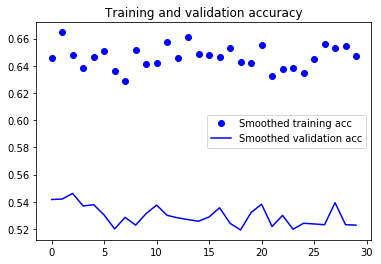

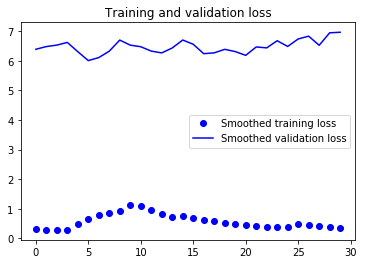

In [62]:
#making above graphs smoother. This is done by replacing every loss and accuracy with exponential moving averages
#This is for readability

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
test_generator = test_datagen.flow_from_directory(
        test_sub_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 38 images belonging to 4 classes.
test acc: 0.525210096242548


In [66]:
test_generator = test_datagen.flow_from_directory(
        validation_sub_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('validation acc:', test_acc)

Found 38 images belonging to 4 classes.
validation acc: 0.5252100981834555
